<a href="https://colab.research.google.com/github/lvisdd/object_detection_tutorial/blob/master/YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/)

## Mount Google Drive

In [1]:
# Mount Google Drive
# [Go to this URL in a browser: URL] -> Authorization Code
# [Enter your authorization code:]

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls -ld "/content/drive/My Drive/"

drwx------ 13 root root 4096 Aug 17 03:00 '/content/drive/My Drive/'


## Detection Using A Pre-Trained Model

In [3]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.16 MiB | 4.78 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.


In [4]:
%cd darknet

/content/darknet


In [0]:
!mkdir -p "/content/drive/My Drive/darknet/backup"
!ln -s "/content/drive/My Drive/darknet/backup" backup

In [6]:
!sed -i.bak -e 's/OPENCV=0/OPENCV=1/g;s/GPU=0/GPU=1/g' Makefile
!diff Makefile.bak Makefile

1c1
< GPU=0
---
> GPU=1
3c3
< OPENCV=0
---
> OPENCV=1


In [7]:
!make

mkdir -p obj
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:947:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pra

In [8]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-08-17 03:02:16--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.1MB/s    in 11s     

2019-08-17 03:02:28 (21.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [9]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [10]:
!ls -l

total 248540
lrwxrwxrwx 1 root root        38 Aug 17 03:01 backup -> '/content/drive/My Drive/darknet/backup'
drwxr-xr-x 2 root root      4096 Aug 17 03:01 cfg
-rwxr-xr-x 1 root root   2025288 Aug 17 03:02 darknet
drwxr-xr-x 3 root root      4096 Aug 17 03:01 data
drwxr-xr-x 2 root root      4096 Aug 17 03:01 examples
drwxr-xr-x 2 root root      4096 Aug 17 03:01 include
-rw-r--r-- 1 root root   2284640 Aug 17 03:02 libdarknet.a
-rwxr-xr-x 1 root root   1947968 Aug 17 03:02 libdarknet.so
-rw-r--r-- 1 root root       515 Aug 17 03:01 LICENSE
-rw-r--r-- 1 root root       474 Aug 17 03:01 LICENSE.fuck
-rw-r--r-- 1 root root      6652 Aug 17 03:01 LICENSE.gen
-rw-r--r-- 1 root root     35141 Aug 17 03:01 LICENSE.gpl
-rw-r--r-- 1 root root       360 Aug 17 03:01 LICENSE.meta
-rw-r--r-- 1 root root      1071 Aug 17 03:01 LICENSE.mit
-rw-r--r-- 1 root root       461 Aug 17 03:01 LICENSE.v1
-rw-r--r-- 1 root root      3040 Aug 17 03:01 Makefile
-rw-r--r-- 1 root root      3040 Aug 17 03:01 Mak

In [0]:
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


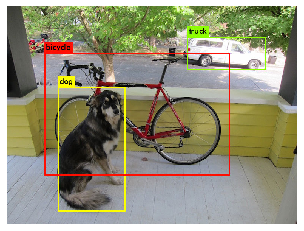

In [12]:
def display_image(file_path = './predictions.jpg'):
    import cv2
    import matplotlib.pyplot as plt
    import os.path

    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")
    ax.set_xticklabels([]) 
    ax.axis('off')

    if os.path.exists(file_path):
      img = cv2.imread(file_path)
      show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img)
    
display_image()

## Training YOLO on VOC

### Get The Pascal VOC Data

In [13]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

--2019-08-17 03:02:46--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  23.1MB/s    in 98s     

2019-08-17 03:04:25 (19.5 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2019-08-17 03:04:26--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  22.6MB/s    in 21s     

2019-08-17 03:04:48 (20.7 MB

### Generate Labels for VOC

In [14]:
!wget https://pjreddie.com/media/files/voc_label.py
!python voc_label.py

--2019-08-17 03:05:36--  https://pjreddie.com/media/files/voc_label.py
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2042 (2.0K) [application/octet-stream]
Saving to: ‘voc_label.py’

voc_label.py        100%[===================>]   1.99K  --.-KB/s    in 0s      

2019-08-17 03:05:37 (283 MB/s) - ‘voc_label.py’ saved [2042/2042]



In [15]:
!ls

2007_test.txt	examples       LICENSE.mit	scripts
2007_train.txt	include        LICENSE.v1	src
2007_val.txt	libdarknet.a   Makefile		VOCdevkit
2012_train.txt	libdarknet.so  Makefile.bak	voc_label.py
2012_val.txt	LICENSE        obj		VOCtest_06-Nov-2007.tar
backup		LICENSE.fuck   predictions.jpg	VOCtrainval_06-Nov-2007.tar
cfg		LICENSE.gen    python		VOCtrainval_11-May-2012.tar
darknet		LICENSE.gpl    README.md	yolov3.weights
data		LICENSE.meta   results


In [0]:
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt

### Modify Cfg for Pascal Data

In [17]:
!sed -i.bak -e "s|/home/pjreddie/data/voc/train.txt|/content/darknet/train.txt|g;s|/home/pjreddie/data/voc/2007_test.txt|/content/darknet/2007_test.txt|g" cfg/voc.data
!diff cfg/voc.data.bak cfg/voc.data

2,3c2,3
< train  = /home/pjreddie/data/voc/train.txt
< valid  = /home/pjreddie/data/voc/2007_test.txt
---
> train  = /content/darknet/train.txt
> valid  = /content/darknet/2007_test.txt


In [18]:
!sed -i.bak -e "s/ batch=1/# batch=1/g;s/# subdivisions=16/ subdivisions=32/g;s/ subdivisions=1/# subdivisions=1/g;s/# batch=64/ batch=128/g;s/max_batches = 50200/max_batches = 10000/g" cfg/yolov3-voc.cfg
!diff cfg/yolov3-voc.cfg.bak cfg/yolov3-voc.cfg

3,4c3,4
<  batch=1
<  subdivisions=1
---
> # batch=1
> # subdivisions=1
6,7c6,7
< # batch=64
< # subdivisions=16
---
>  batch=128
>  subdivisions=32
20c20
< max_batches = 50200
---
> max_batches = 10000


### Download Pretrained Convolutional Weights

In [19]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2019-08-17 03:05:58--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  19.5MB/s    in 8.9s    

2019-08-17 03:06:07 (17.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



### Train The Model

In [0]:
# Now we can train! Run the command:
!./darknet detector train cfg/voc.data cfg/yolov3-voc.cfg darknet53.conv.74 > log.txt 2>&1

In [0]:
# If you want to stop and restart training from a checkpoint:
!./darknet detector train cfg/voc.data cfg/yolov3-voc.cfg backup/yolov3-voc.backup > log.txt 2>&1

In [22]:
!cat log.txt

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

In [23]:
!./darknet detector test cfg/voc.data cfg/yolov3-voc.cfg backup/yolov3-voc_final.weights VOCdevkit/VOC2007/JPEGImages/000009.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


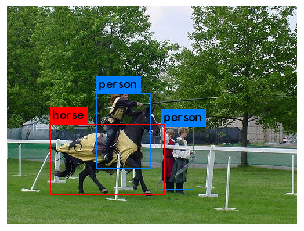

In [24]:
display_image()